# КУРСОВОЙ ПРОЕКТ 1

<HR>

## Решение

### 1. ИМПОРТ БИБЛИОТЕК И ИХ КОФИГУРАЦИЯ

In [80]:
import re
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno # Для анализа пропущенных значений
plt.style.use('seaborn')

In [2]:
# Игнорирование SettingWithCopyWarning 
pd.options.mode.chained_assignment = None

### 2. КОНФИГУРАЦИЯ ШРИФТОВ

In [3]:
plt.rc('xtick', labelsize = 22) # Кастомизация для подписи данных осей Х: размер 22
plt.rc('ytick', labelsize = 22) # -|- осей У: размер 22
font_settings = {'family': 'Arial', 'size': 25} # Для подписей графиков, осей и прочего. 

### 3. АНАЛИЗ И ВИЗУАЛИЗАЦИЯ ДАННЫХ 

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


### А - ОБЪЕДИНЕНИЕ ДАТАСЕТОВ

In [4]:
# Запишем объекты pandas.DataFrame в переменные:
df1 = pd.read_csv('Data/course_contents.csv') # список курсов, модулей и уроков в них
df2 = pd.read_csv('Data/courses.csv') # курсы, названия и сфера отнесения
df3 = pd.read_csv('Data/progresses.csv') # прогресс (id) конкр. студента (sutdent_id) в конкр. курсе (course_id)
df4 = pd.read_csv('Data/progress_phases.csv') # прогресс конкр. студента (progress_id) в уроках модулей.

**A-1. ОБЪЕДИНЕНИЕ: df3 & df4 -> df_progress**

In [5]:
# Переименуем столбец df4.progress_id  в df4.id: 
df4.rename(columns = {'progress_id': 'id'}, inplace = True)

# Объединим фреймы
df_progress = df3.merge(df4, on ='id', how = 'inner')
df_progress.tail(2) 

,id,student_id,course_id,module_number,lesson_number,status,start_date,finish_date
350675,d20495c847f8471aef66a01a683d69da,4654f37c3ef3006b82fc10becab38942,bf27a4bf4ada4c756451703ea62a914f,1,2,done,2019-07-15 19:59:03.62921+00,2019-07-15 20:13:31.366488+00
350676,d20495c847f8471aef66a01a683d69da,4654f37c3ef3006b82fc10becab38942,bf27a4bf4ada4c756451703ea62a914f,1,1,done,2019-07-15 19:25:39.837435+00,2019-07-15 19:59:03.607155+00


**А-2. ОБЪЕДИНЕНИЕ df1 & df2 -> df_courses**

In [6]:
df2.rename(columns = {'id': 'course_id'}, inplace = True)
df_courses = df1.merge(df2, on = 'course_id', how = 'inner')
df_courses.tail(2)

,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,Unnamed: 0,title,field
1199,e9bb9205eeed307ee7cbaa08bfd166c3,17,Бонус,3,Тестирование кода,34f79860-e127-4e09-852d-6bbba205ee68,True,False,5,JavaScript с нуля,Development
1200,e9bb9205eeed307ee7cbaa08bfd166c3,18,Экзаменационное задание,1,Экзаменационная работа,c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4,False,True,5,JavaScript с нуля,Development


### Объединение в финальную рамку: df_progress & df_courses -> df_final

In [7]:
df_final = pd.merge(df_progress, df_courses, on = ['course_id', 'module_number', 'lesson_number' ], how = 'left', indicator = True)
df_final.tail(2)

,id,student_id,course_id,module_number,lesson_number,status,start_date,finish_date,module_title,lesson_title,lesson_token,is_video,is_homework,Unnamed: 0,title,field,_merge
350675,d20495c847f8471aef66a01a683d69da,4654f37c3ef3006b82fc10becab38942,bf27a4bf4ada4c756451703ea62a914f,1,2,done,2019-07-15 19:59:03.62921+00,2019-07-15 20:13:31.366488+00,"Введение в интернет-маркетинг: цели, инструмен...",Понятие интернет-маркетинга,dbb78131-978b-4478-9483-01119e26bfdd,True,False,9,Интернет-маркетолог от Ingate,Marketing,both
350676,d20495c847f8471aef66a01a683d69da,4654f37c3ef3006b82fc10becab38942,bf27a4bf4ada4c756451703ea62a914f,1,1,done,2019-07-15 19:25:39.837435+00,2019-07-15 19:59:03.607155+00,"Введение в интернет-маркетинг: цели, инструмен...",Вводный урок,ee4ed4fc-99cf-4d76-9ff8-98f24cd3ce0a,True,False,9,Интернет-маркетолог от Ingate,Marketing,both


In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   id             350677 non-null  object  
 1   student_id     350677 non-null  object  
 2   course_id      350677 non-null  object  
 3   module_number  350677 non-null  int64   
 4   lesson_number  350677 non-null  int64   
 5   status         350677 non-null  object  
 6   start_date     350677 non-null  object  
 7   finish_date    334508 non-null  object  
 8   module_title   350677 non-null  object  
 9   lesson_title   350677 non-null  object  
 10  lesson_token   350677 non-null  object  
 11  is_video       350677 non-null  bool    
 12  is_homework    350677 non-null  bool    
 13  Unnamed: 0     350677 non-null  int64   
 14  title          350677 non-null  object  
 15  field          350677 non-null  object  
 16  _merge         350677 non-null  category
dtypes: bool(2)

Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

In [9]:
df_final[df_final.student_id == '768c2987a744c51ce64a5993a2a94eaf'].tail(2) 

,id,student_id,course_id,module_number,lesson_number,status,start_date,finish_date,module_title,lesson_title,lesson_token,is_video,is_homework,Unnamed: 0,title,field,_merge
238,5767046d89ed7563a0c3a9a3896a23e6,768c2987a744c51ce64a5993a2a94eaf,04ba6d0b40670c43a209141fa01fa784,2,1,done,2018-02-22 08:54:10.987784+00,2018-02-22 08:57:30.914939+00,12 принципов анимации от Walt Disney Studio,Интро,7ea16a2d-e6d1-4158-907f-ae0ce8379c45,True,False,6,Анимация интерфейсов,Design,both
239,5767046d89ed7563a0c3a9a3896a23e6,768c2987a744c51ce64a5993a2a94eaf,04ba6d0b40670c43a209141fa01fa784,2,3,fail,2018-04-28 13:45:40.955076+00,NaN,12 принципов анимации от Walt Disney Studio,Домашняя работа,f6f37ada-7763-4a06-9e45-a42ca568e69a,False,True,6,Анимация интерфейсов,Design,both


<hr>

**I - Общее количество курсов в датасете**

In [10]:
course_group = df_final.groupby('title')
course_count = course_group.agg('sum').index
print('Общее количество курсов -')
pd.Series(list(course_count)).count()

Общее количество курсов -


15

**II - Количество модулей на каждом курсе**

In [11]:
modules = course_group.agg({'module_number': set}).agg({'module_number': len})
modules.rename(columns = {'module_number': 'number_of_modules'}, inplace = True)
print('Количество модулей на каждом курсе:')
modules

Количество модулей на каждом курсе:


,number_of_modules
title,
Excel Базовый,9
Java-разработчик,17
Java-разработчик c нуля,9
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,11
UX-дизайн,20
Анимация интерфейсов,21
Веб-вёрстка для начинающих 2.0,8


**III - Количество уроков в каждом модулей, на каждом курсе**

In [12]:
course_module = df_final.groupby(['title', 'module_title']).agg({'lesson_number': set}).agg({'lesson_number': len})
course_module.rename(columns = {'lesson_number': 'number_of_lessons'}, inplace = True)
course_module

number_of_lessons
title                         module_title                                                         
Excel Базовый                  Визуализация данных Excel                                          5
                              Основной функционал Excel                                          11
                              Основной функционал Excel (продолжение)                             7
                              Сводные таблицы Excel                                               5
                              Формулы и функции Excel. Более сложные формулы                      5
...                                                                                             ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                                   5
                              Требовательность digital-продюсера                                  4
                              Управление временем                                                 4
                              Управление дизайнерами. Разработка дизайна по s...                  7
                              Экологичный путь менеджера                                          4

[229 rows x 1 columns]

<hr>

**IV - Медианное количество уроков в модуле на каждом курсе**

In [13]:
# В датасете df_courses каждая строка соотв. уникальному уроку уникального модуля.
# => посчитать количество уроков в модуле позволит метод count() после группировки данных по курсам и модулям. 
lessons = df_courses.groupby(['title', 'module_number'])['lesson_number'].count().unstack()

# Воспользуемся методом median по строкам с параметром numeric_only = True
lessons['lessons_med'] = lessons.median(axis = 1, numeric_only = True)
lessons.head()

module_number,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,lessons_med
title,,,,,,,,,,,,,,,,,,,,,
Excel Базовый,11.0,7.0,3.0,7.0,5.0,5.0,5.0,5.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
Java-разработчик,8.0,8.0,9.0,9.0,7.0,6.0,5.0,7.0,7.0,8.0,...,5.0,7.0,6.0,8.0,1.0,NaN,NaN,NaN,NaN,7.0
Java-разработчик c нуля,7.0,6.0,10.0,27.0,13.0,13.0,13.0,11.0,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
JavaScript с нуля,7.0,12.0,8.0,9.0,5.0,4.0,5.0,7.0,8.0,9.0,...,9.0,6.0,6.0,7.0,3.0,1.0,NaN,NaN,NaN,7.0
PHP-разработчик с 0 до PRO. Часть 1,5.0,7.0,4.0,4.0,4.0,3.0,13.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


<hr>

**V - Количество студентов на каждом курсе**

In [14]:
students = df_final.groupby(['title', 'student_id']).count()['id'].unstack()
print(f'Всего активных студентов - {students.count(axis = 1).sum()} человек \nРаспределение по курсам: ')
students.count(axis = 1)

Всего активных студентов - 15929 человек 
Распределение по курсам: 


title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                506
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
dtype: int64

<hr>

**VI - Min, max, avg, median для возраста студентов**

- поскольку даже неактивные студенты (которые на момент составления БД не числились ни на одном активном курсе) имеют прямое отношение к платформе - учились / завершили / планируют возобновить обучение, расчет описательных статистик для данногу пункта производится по всем студентам с адекватным (релевантным, верно указанным, правдоподобным) возрастом, числящимся в базе. 

In [15]:
# Выгрузка данных из датафайла
st_desc = pd.read_csv('Data/students.csv')
# Вырезка только тех строк, по которым ячейки с ДР заполнены
st_edited = st_desc[st_desc.birthday.isna() == False]

# Приведение строк с ДР к объекту типа Timestamp. Все ошибочные даты рождения будут приведены к NaT
st_edited['bday_date'] = st_edited.birthday.apply(pd.to_datetime, errors = 'coerce')

# Проверим, есть ли такие: 
# Да, есть - 9 строк. Их исключим. 
st_edited[st_edited.bday_date.isnull()]

,id_,id,city,birthday,bday_date
4605,38134,6d486f0ccc4fc43093d82e48e7dba851,Москва,0235-05-31,NaT
7261,36361,569d47a7519b4fccd37c7f193357a3d7,Казань,0001-05-28,NaT
7408,42112,9c617fe74f0ca3fde731b20717bda5b9,Miami,9000-11-11,NaT
8625,35283,0ba8dbddadb0f6f9d5a0207360dcc657,NaN,0986-06-04,NaT
21051,39499,542130d5101c8561b326c4cd85bdea29,Vienna,8198-09-19,NaT
25418,98989,19677c06d0942f9d73fee32a7e23a9fb,Кукуево,1601-01-01,NaT
27641,28974,d44825db266034cf3bed0fec4caafbb9,Petrozavodsk,0998-08-24,NaT
36069,39502,1eb63b3df883d14cebecec90ce9ed5f4,Санкт-Петербург,9187-04-19,NaT
42745,31307,cc687dd2104e1e07dbc701b0e043fcfc,Moscow,0084-05-09,NaT


#### Формирование конечной рамки с возрастами студентов
<br>Включаем в конечный срез только те возраста, в которых человек может обучаться специализации:
- не менее 16 лет (11 класс средней школы)
- не старше 70 лет 
- возраста, которым соответствуют даты рождения <b>раньше</b> сегодняшнего дня.

<br>Другие возраста принимаем за указанные не всерьез и, т.о., нерелевантные. 

 1 - Вычисляем разницу "сегодня - дата рождения" - получается объект Timedelta
 <br>2 - Приводим Timedelta к строковому виду - получаем строки возрастов.

 3 - Экскавация возраста студента в годах: 
 <br>3А: Применив re, забираем идущие первыми <b>числовые символы</b> до <b>первого пробела</b> из строк возрастов - получаем возраст в днях  
  3В: Привели подстроку к целому и разделили нацело на 365 - возраст в годах
 <br>3С: Наложили фильтрацию  today > x  и 16 <= age <= 70. 

4 - Применили lambda-функцию: 
Если возраст соответствует условию фильтрации, добавляем в столбец. 
<br>Если нет, добавляем универсальное пустое значение <b>None</b>, которое впоследствии смогут обработать функции pandas. 

<br>5 - В финальную рамку отобрали только те строки, рассчитанные возраста по которым не оказались пустыми значениями

In [16]:
# Очищаем рамку от строк с ошибочными датами рождения:
st_interim = st_edited[(st_edited.bday_date.isnull() == False)]

# Запись в память переменной текущей даты:
from datetime import datetime
today = pd.to_datetime(str(datetime.today().date()))

st_interim['age'] = st_interim.bday_date\
.apply(lambda x: int(re.search(r'\d+', str(today - x)).group())//365 if (today > x) and (16 <= int(re.search(r'\d+', str(today - x)).group())//365 <= 70) else None)

st_final = st_interim[st_interim['age'].isnull() == False][['id', 'age']]
st_final.rename(columns = {'id': 'student_id'}, inplace = True)
print(st_final.shape)
st_final.tail()

(25303, 2)


,student_id,age
43821,75e54bba2c6a49602ae0547e1f990d21,28.0
43824,afbc1ca2ed9ff60239c5d95e0df23856,27.0
43825,a65ccacbe0226b345f195d02e676aa04,21.0
43826,148f1375e4135e779053a0d4b2a63857,22.0
43828,9ff58c490f6ee5b013e7f62140ee3d79,23.0


In [17]:
for f in ['max', 'min', 'mean', 'median']:
    print(f'{f} age - {st_final.age.apply(f)}'.upper())

MAX AGE - 70.0
MIN AGE - 16.0
MEAN AGE - 30.721455953839467
MEDIAN AGE - 30.0


<hr>

**VII - Min, max, avg, median для возраста студентов на каждом курсе**
<br>
- Поскольку в данном пунке стоит задача вычислить описательные статистики для студентов на курсах, мы берем только тех студентов из базы, которые на данный момент активны, то есть числятся учащимися хотя бы на одном курсе.
<br><br>
- Объединим рамки данных. Ориентируемся на правый датасет, чтобы в выборку попали все активные студенты: даже те, которые по каким-то причинам еще не занесены в таблицу students.csv. **how = 'right'**. 
Впоследствии это поможет сравнить результаты подсчета числа активных студентов на каждом курсе по таблице df_final. 
<br><br> 
- В датафрейме **df_final** для одного и того же активного студента и его курса находится **множество записей прохождения уроков**. По этой причине при объединении датафреймов возникают **повторяющиеся записи**. На данном этапе нам надо сопоставить **только студента и его активные курсы**. По этой причине все повторяющиеся записи удалим с применением метода **drop_duplicates()**.

In [18]:
stud_course = pd.merge(st_final, 
                         df_final[['field', 'title', 'student_id']], 
                         on = 'student_id',
                         how='right').drop_duplicates()

print(f'В сумме активных студентов по курсам - {stud_course.shape[0]} человек.\nОдин и тот же студент может быть зачислен на несколько курсов.')

stud_course

В сумме активных студентов по курсам - 15929 человек.
Один и тот же студент может быть зачислен на несколько курсов.


,student_id,age,field,title
0,a6ae278c0eab719b3784e5ea147c128f,NaN,Business,Руководитель digital-проектов
4,e24062de06d301937b3b3a8e383e3e21,NaN,Marketing,Интернет-маркетолог от Ingate
16,35a36d90b745992b59085c8d54a072e7,30.0,Development,Java-разработчик
19,37e8e8179295ae764524223086b0b568,34.0,Development,Веб-вёрстка для начинающих 2.0
20,37e8e8179295ae764524223086b0b568,34.0,Design,Веб-дизайн Базовый
...,...,...,...,...
350649,a9e1b3b7afd461fdf1c3c1f12eb15f0e,20.0,Design,Веб-дизайн с нуля 2.0
350669,0f12abf574cff459768ec97e236f8f01,24.0,Development,PHP-разработчик с 0 до PRO. Часть 1
350670,e2eacf5b3bb299f535fb48fe29f2daf2,32.0,Marketing,Интернет-маркетолог от Ingate
350673,880e5d95c043a0bc343c238030b8c8a6,34.0,Design,Веб-дизайн с нуля 2.0


In [19]:
sc_age = stud_course.groupby(['title', 'student_id']).agg('mean')['age'].unstack()
sc_age.tail()

student_id,000333b6aa5706c53f4d2ec24c7a128d,0007e271c3f2f20ff8675df9d81e0401,000ca3ad0aaedff60d95d309b038210b,0010ab47e706e3ae6ac718d5cf06b752,00114204df65ed8458822835b928393c,001b192f899a84496be98b41906246fc,00220bd7565b64bb24bd98537984512a,00386b771938472b2df62108f5985c1e,005c337df2985c082930bb80599a1777,00647ca62c6f122f9116f4b59157d26a,...,ffc165fc00d0172ec1bea5397e67ade8,ffc4008315dff59b29e7733f43f85913,ffcab072956be8f20917dddb726be5ad,ffcf2d24dff1f38f54568f9d92009dc9,ffd5ac3a4ea4db78f1f7c9243ecd8cbb,ffd7a91bcf8acfe1afd2e74c7374cf23,ffe5329154259d3f3f5eee58a06ef6f5,ffef4e9e2855886ae9aaac19cd5020e6,fff9c6b403f88a6b83dc1837a93dc4dd,fffc0307abdaa5ba8bf0b6e88b101712
title,,,,,,,,,,,,,,,,,,,,,
Веб-дизайн Базовый,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Веб-дизайн с нуля 2.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN,34.0,NaN,20.0,...,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Веб-разработчик,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Интернет-маркетолог от Ingate,NaN,NaN,22.0,40.0,32.0,NaN,NaN,NaN,33.0,NaN,...,26.0,NaN,21.0,NaN,23.0,NaN,NaN,36.0,NaN,31.0
Руководитель digital-проектов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Вычисляем описательные статистики по строкам, добавляем столбцы с опис. статистиками:

for act in [{'metric': 'min', 'func': sc_age.min}, 
            {'metric': 'max', 'func': sc_age.max}, 
            {'metric': 'mean', 'func': sc_age.mean},
            {'metric': 'median', 'func': sc_age.median}]: 
    sc_age[act['metric']] = act['func'](axis = 1, numeric_only = True) 

sc_age[['min', 'max', 'mean', 'median']]

student_id,min,max,mean,median
title,,,,
Excel Базовый,18.0,62.0,35.284431,35.0
Java-разработчик,16.0,66.0,30.997097,30.0
Java-разработчик c нуля,16.0,56.0,31.213425,30.0
JavaScript с нуля,16.0,61.0,30.275410,29.0
PHP-разработчик с 0 до PRO. Часть 1,16.0,68.0,31.142857,30.0
SMM-маркетолог от А до Я,19.0,53.0,30.608081,30.0
UX-дизайн,16.0,59.0,31.802605,31.0
Анимация интерфейсов,16.0,52.0,31.267161,31.0
Веб-вёрстка для начинающих 2.0,16.0,61.0,30.292431,29.0


<hr>

**VIII - Bar-chart: количество студентов на каждом курсе**

Количество активных участий студентов на каждом курсе - 15929.0


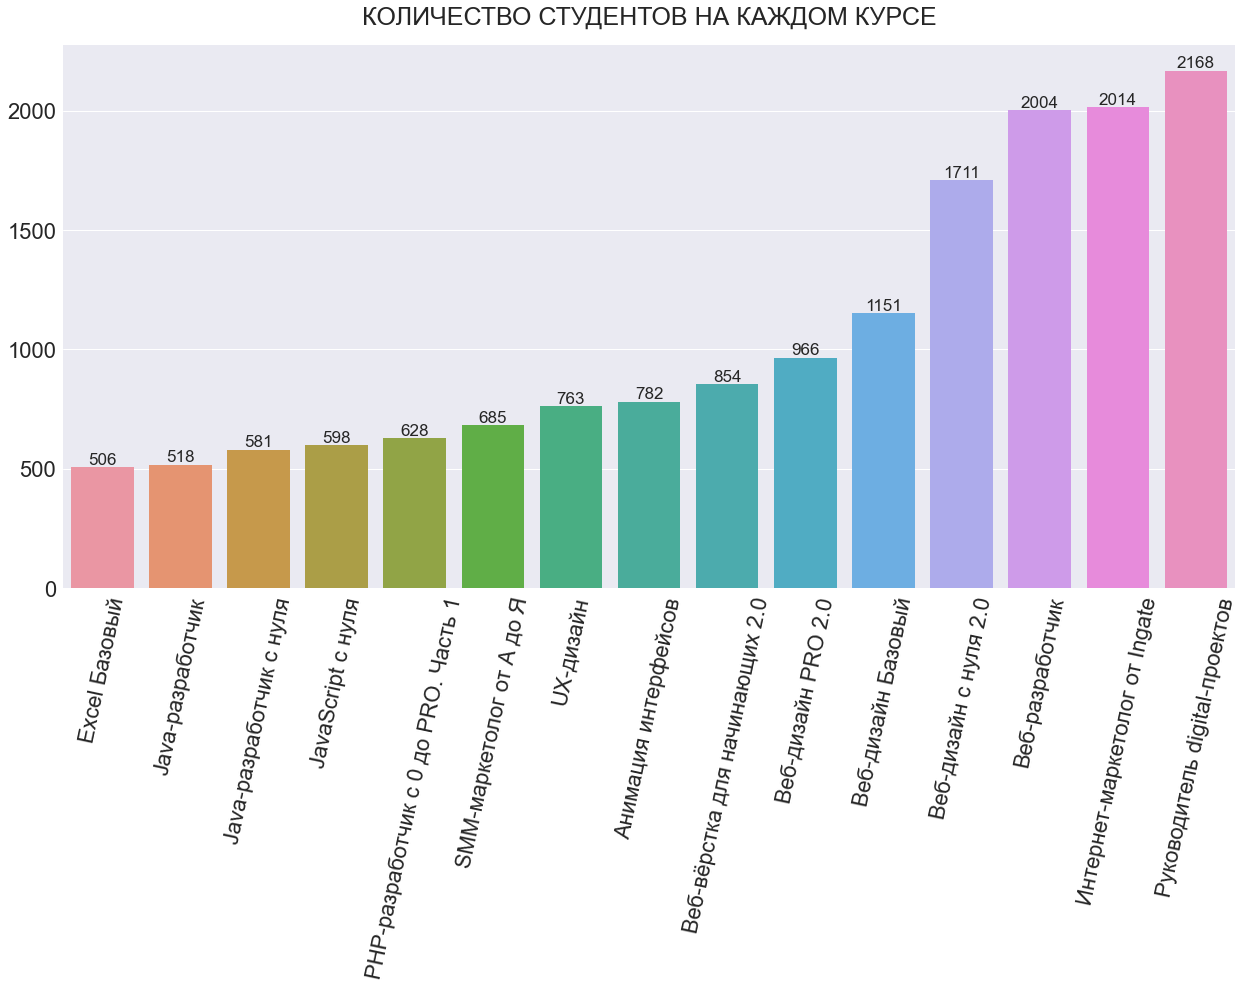

In [21]:
data_for_chart = students.count(axis = 1)
fig_b, ax_b = plt.subplots(figsize = (21,10))
bar_chart = sns.barplot(ax = ax_b, 
           data = data_for_chart, 
           x = data_for_chart.index, 
           y = data_for_chart)
ax_b.set_xticklabels(labels = list(data_for_chart.index), rotation = 78)
ax_b.set_title('Количество студентов на каждом курсе'.upper(), size = 25, pad = 20)

# Аннотация столбцов
patches = bar_chart.patches
xcoords = [item.get_x() + item.get_width() / 2 for item in patches]
ycoords = [item.get_height() for item in patches]

print(f'Количество активных участий студентов на каждом курсе - {np.array(ycoords).sum()}')

for x,y in zip(xcoords, ycoords): 
    bar_chart.annotate(text = f'{int(y)}', 
                       xy = (x,y + 30), 
                       ha = 'center', 
                       va = 'center', 
                       size = 17)

plt.show()

<hr>

**IX - ⭐ Дополнительный bar plot с маркированием областей курсов**

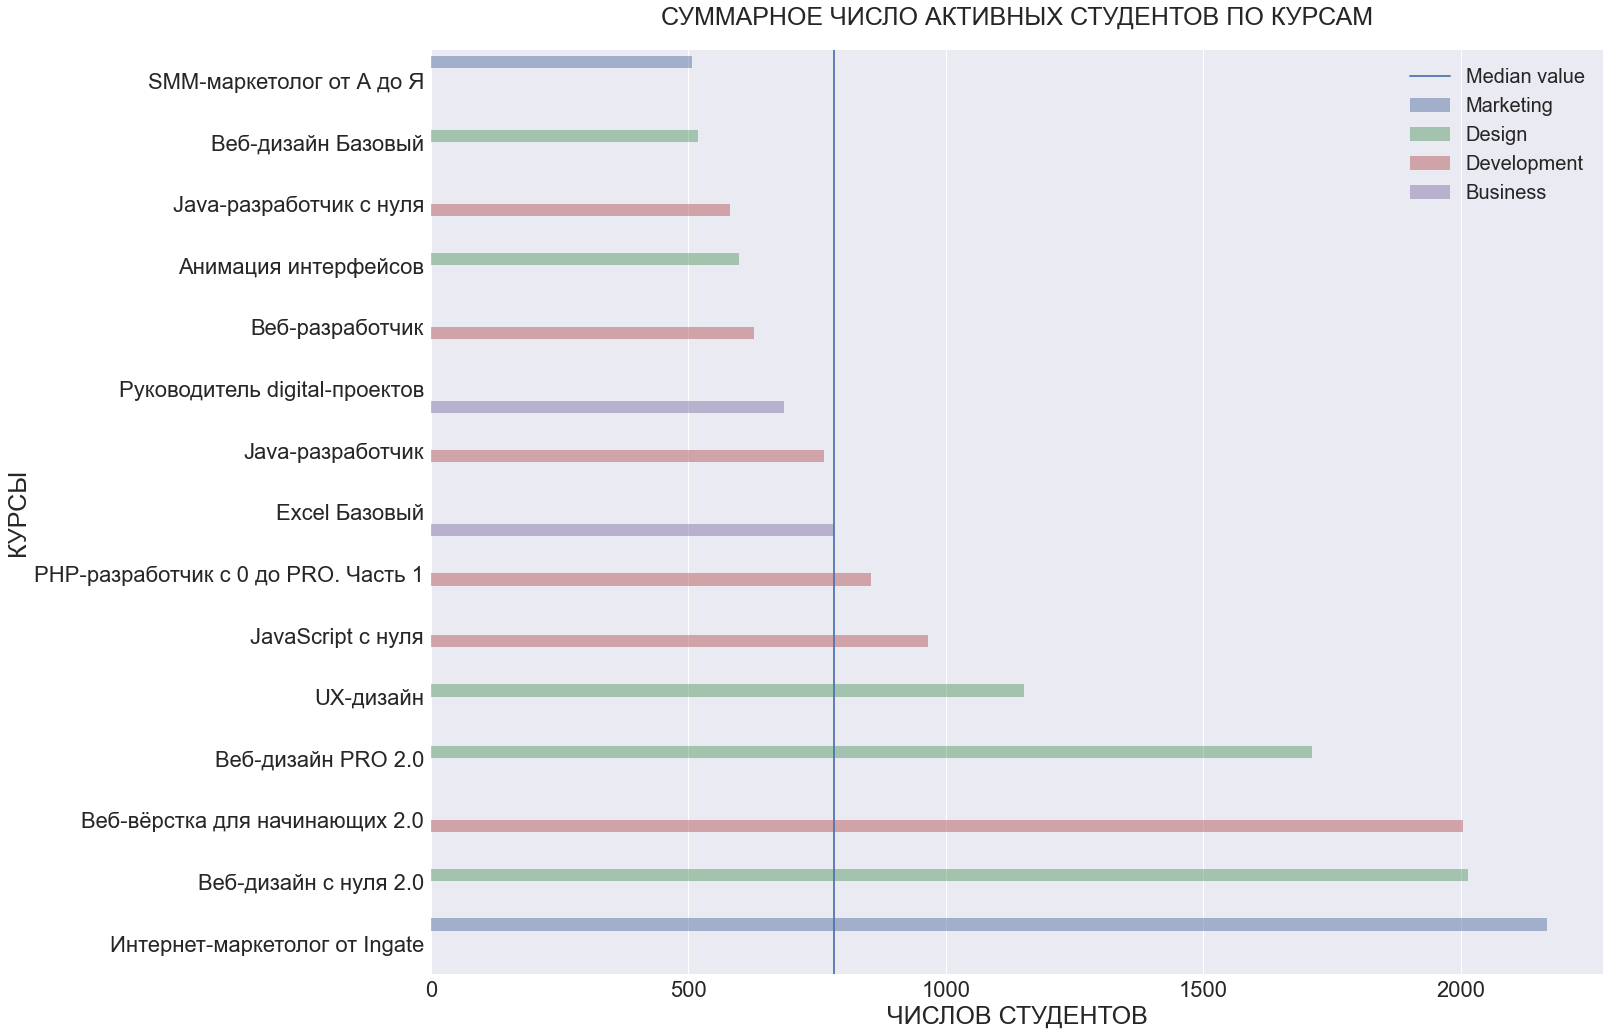

In [22]:
data_2 = stud_course.groupby(['title', 'field']).agg({'student_id': 'count'})
data_2.reset_index(inplace = True)
fig_2, ax_2 = plt.subplots(figsize = (21, 17))
bar_chart_2 = sns.barplot(ax = ax_2, 
                          data = data_2.sort_values('student_id', ascending = True), 
                          x = 'student_id', 
                          y = 'title', 
                          hue = 'field', alpha = 0.5)

ax_2.set_title('суммарное число активных студентов по курсам'.upper(), **font_settings, pad = 25)
ax_2.set_xlabel('числов студентов'.upper(), **font_settings)
ax_2.set_ylabel('курсы'.upper(), **font_settings)
ax_2.axvline(data_2.student_id.median(), label = 'Median value')
ax_2.legend(loc= 'upper right', fontsize = 20)
plt.show()

In [23]:
print('Общее число активных студентов (уникальных по всей выборке:')
pd.Series(stud_course.student_id.unique()).count()

Общее число активных студентов (уникальных по всей выборке:


9794

**X - Описание данных**

Описательный анализ позволяет сделать следующие выводы:
1. Суммарное число активных участников по курсам - **15 929 человек по 15 курсам**. Многие студенты принимают участие сразу в нескольких курсах, соответственно, учитываются во всех курсах, в которых числятся, как отдельные участники. 
2. Общее число активных студентов, уникальных по всей выборке, - **9794 человека**.
3. Наиболее популярный курс среди студентов - "Интернет-маркетолог от Ingate" - 2 168 человек. 
4. Наименее популярный курс среди студентов - SMM-маркетолог от А до Я - 506 человек. 
5. Общее число студентов в базе данных, по которым можно вычислить возрастную компоненту, - **25 259** человек. Это - студенты, которые активны на данный момент, а также которые обучались ранее или приостановили обучение. Средний возраст студентов колеблется вокруг 30 лет. Медианный возраст студентов достигает того же значения. 

<hr>
<hr>

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

**I - Расчет прироста студентов по месяцам для каждого курса**

- Приведение строк дат начала и конца прохождения урока к объектам типа Timestamp **-> pd.to_datetime** 
- **Первая домашняя работа** - последний урок первого модуля каждого курса
Выбор только тех строк, которые соответствуют **module_number == 1, lesson_title = 'Домашняя работа'**
- Группировка и сортировка числа слушателей каждого курса по месяцам и годам
- Для каждого курса: добавление периодов, в которых не было активных студентов 
- Расчет прироста 

In [24]:
df_final[['start_date', 'finish_date']] = df_final[['start_date', 'finish_date']]\
.apply(pd.to_datetime)

data_prepared = df_final\
.groupby(['title', 'student_id', 'module_number', 'lesson_title', 'start_date'], as_index = False)\
.count()[['title', 'student_id', 'module_number', 'lesson_title', 'start_date']]

data_prepared['start_month'] = data_prepared['start_date'].apply(lambda x: x.month)
data_prepared['start_year'] = data_prepared['start_date'].apply(lambda x: x.year)

# Отбор строк, соответствующих 1 и уроку "Домашняя работа" в каждом курсе
data_int = data_prepared[(data_prepared.module_number == 1) & (data_prepared.lesson_title == 'Домашняя работа')]\
.sort_values(['start_year', 'start_month'], ascending = True)\
.groupby(['title', 'start_year', 'start_month'], as_index = False).count()[['title', 'start_year', 'start_month', 'student_id']]

data_int.head()

,title,start_year,start_month,student_id
0,Excel Базовый,2018,2,6
1,Excel Базовый,2018,3,3
2,Excel Базовый,2018,5,3
3,Excel Базовый,2018,6,9
4,Excel Базовый,2018,7,13


In [25]:
# Полная выборка курсов, лет и месяцев периода исследования:
my_c = list(data_for_chart.index)
my_y = range(2016, 2020, 1)
my_m = range(1, 13, 1)

In [26]:
# Далеко не в каждом месяце и году на курсах были новые студенты. 
# Эти неактивные периоды нужно добавить в DF в виде новых строк "курс - год - месяц"
# с числом студентов = 0. 

# Для каждого курса:
for a in my_c: 
    # Для каждого года:
    for b in my_y: 
        # Для каждого месяца:
        for c in my_m:
            # Если строки с такой комбинацией значений курса, года и месяца не существует, 
            # значит, в этот период не было ни одного нового студента. Добавляем строку последней: 
            if any((data_int.title == a) & (data_int.start_year == b) & (data_int.start_month == c)) == False: 
                data_int.loc[len(data_int)] = [a, b, c, 0]

In [27]:
data_int.sort_values(['title', 'start_year', 'start_month'], ascending = True, inplace = True)
data_int.reset_index()

,index,title,start_year,start_month,student_id
0,226,Excel Базовый,2016,1,0
1,227,Excel Базовый,2016,2,0
2,228,Excel Базовый,2016,3,0
3,229,Excel Базовый,2016,4,0
4,230,Excel Базовый,2016,5,0
...,...,...,...,...,...
715,715,Руководитель digital-проектов,2019,8,0
716,716,Руководитель digital-проектов,2019,9,0
717,717,Руководитель digital-проектов,2019,10,0
718,718,Руководитель digital-проектов,2019,11,0


In [28]:
# Расчет прироста студентов

for ind in data_int.index:
    if ind != 0: 
        data_int.loc[ind, 'growth'] = (data_int.loc[ind, 'student_id'] / data_int.loc[ind - 1, 'student_id'] - 1)*100
    else: 
        data_int.loc[ind, 'growth'] = None
data_int.fillna(0, inplace = True)
data_int

C:\Users\vsevo\AppData\Local\Temp/ipykernel_10308/618016962.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  data_int.loc[ind, 'growth'] = (data_int.loc[ind, 'student_id'] / data_int.loc[ind - 1, 'student_id'] - 1)*100


,title,start_year,start_month,student_id,growth
226,Excel Базовый,2016,1,0,-100.0
227,Excel Базовый,2016,2,0,0.0
228,Excel Базовый,2016,3,0,0.0
229,Excel Базовый,2016,4,0,0.0
230,Excel Базовый,2016,5,0,0.0
...,...,...,...,...,...
715,Руководитель digital-проектов,2019,8,0,0.0
716,Руководитель digital-проектов,2019,9,0,0.0
717,Руководитель digital-проектов,2019,10,0,0.0
718,Руководитель digital-проектов,2019,11,0,0.0


**II - Визуализация с построением линейных графиков**

In [29]:
import warnings

def fxn():
    warnings.warn("deprecated", RuntimeWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

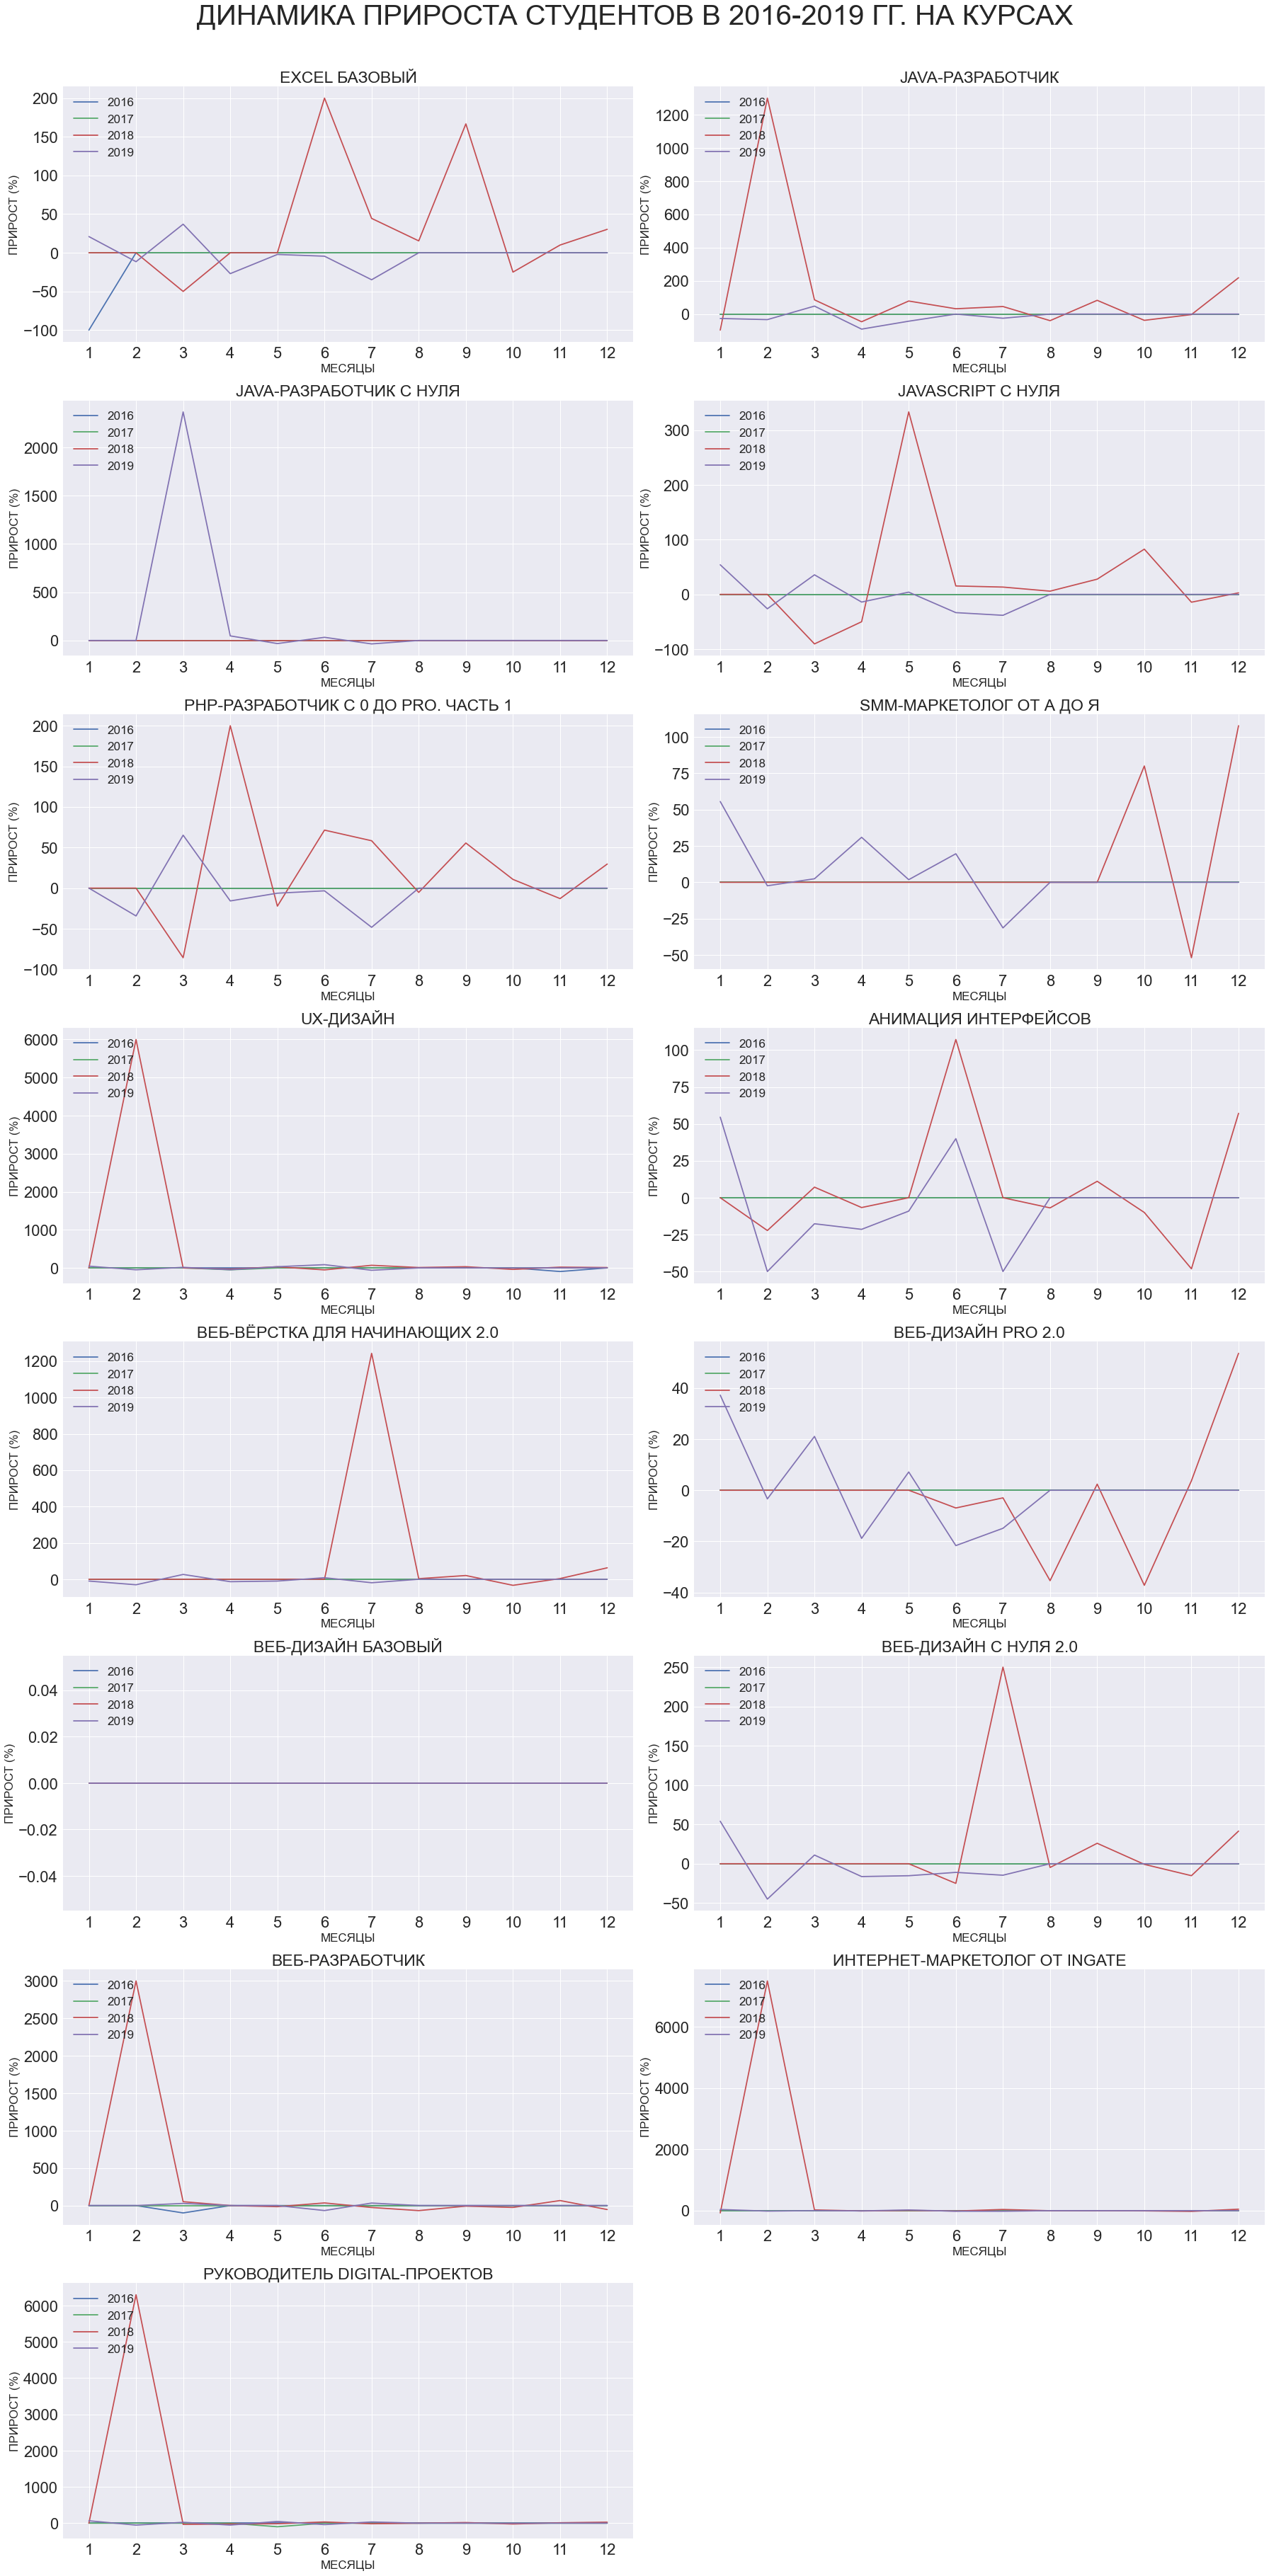

In [30]:
fig_courses, ax_courses = plt.subplots(nrows = 8, ncols = 2, figsize = (25,50))
ax_courses[7, 1].set_axis_off()
fig_courses.suptitle('динамика прироста студентов в 2016-2019 гг. на курсах'.upper(), size = 40, y = 1.01)
ctd = [{'course': my_c[0], 'i': 0, 'j': 0},
       {'course': my_c[1], 'i': 0, 'j': 1},
       {'course': my_c[2], 'i': 1, 'j': 0},           
       {'course': my_c[3], 'i': 1, 'j': 1},
       {'course': my_c[4], 'i': 2, 'j': 0},
       {'course': my_c[5], 'i': 2, 'j': 1},
       {'course': my_c[6], 'i': 3, 'j': 0},
       {'course': my_c[7], 'i': 3, 'j': 1},
       {'course': my_c[8], 'i': 4, 'j': 0},
       {'course': my_c[9], 'i': 4, 'j': 1},
       {'course': my_c[10], 'i': 5, 'j': 0},
       {'course': my_c[11], 'i': 5, 'j': 1},
       {'course': my_c[12], 'i': 6, 'j': 0},
       {'course': my_c[13], 'i': 6, 'j': 1},
       {'course': my_c[14], 'i': 7, 'j': 0}]
                   
for c in ctd: 
    for year in my_y: 
        sns.lineplot(ax = ax_courses[c['i'], c['j']],
                    data = data_int[(data_int.title == c['course']) & (data_int.start_year == year)], 
                    x = 'start_month', 
                    y = 'growth', 
                    label = year)
    ax_courses[c['i'], c['j']].set_title(f"{c['course']}".upper(), size = 23)
    ax_courses[c['i'], c['j']].set_xticks(list(my_m))
    ax_courses[c['i'], c['j']].set_xlabel('месяцы'.upper(), size = 17)
    ax_courses[c['i'], c['j']].set_ylabel('прирост (%)'.upper(), size = 17)
    ax_courses[c['i'], c['j']].legend(loc = 'upper left', fontsize = 17)

fig_courses.tight_layout()
plt.show()

<br>

#### IV, V - прогрессы по месяцам и их динамика на графике

 Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
 
 <br>
 Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы

In [242]:
df_dyn = df_final[df_final['lesson_title'] == 'Домашняя работа'][['title', 'module_number', 'student_id','start_date', 'finish_date']]

In [243]:
df_dyn['start_month'] = df_dyn.start_date.apply(lambda x: x.month)
df_dyn['start_year'] = df_dyn.start_date.apply(lambda x: x.year)
df_dyn['finish_month'] = df_dyn.finish_date.apply(lambda x: x.month)
df_dyn['finish_year'] = df_dyn.finish_date.apply(lambda x: x.year)

In [244]:
# Уберем ненулевые строки, поскольку эти домашки так и не были завершены на момент составления датасета
df_dyn = df_dyn.dropna()
df_dyn.loc[:, 'delta_days'] = (df_dyn['finish_date'] - df_dyn['start_date']).apply(lambda x: x.days)

In [245]:
df_dyn.loc[:, 'delta_month'] = df_dyn.delta_days.apply(lambda x: np.ceil(x/30))

In [246]:
df_dyn.loc[:, 'delta_year'] = df_dyn.delta_month.apply(lambda x: np.ceil(x/12))

In [247]:
df_dyn = df_dyn[['student_id', 'title', 'module_number',  'start_month', 'start_year', 'finish_month', 'finish_year', 'delta_days', 'delta_month', 'delta_year']]

In [248]:
df_dyn.loc[:, 'start_tuple'] = list(zip(df_dyn['start_month'], df_dyn['start_year']))
df_dyn.loc[:, 'finish_tuple'] = list(zip(df_dyn['finish_month'], df_dyn['finish_year']))

In [261]:
df_dyn.head(3)[['start_tuple', 'finish_tuple']]

,start_tuple,finish_tuple
0,"(2, 2018)","(2.0, 2018.0)"
6,"(2, 2018)","(2.0, 2018.0)"
23,"(7, 2018)","(7.0, 2018.0)"


Вспомогательный элемент: список кортежей с кодировками по месяцам

In [250]:
# кастомизированная функция для применения к любому разбегу, не только 2016-2019
def form_month_codes(min_year = None, max_year = None):
    codes = []
    code = 0 
    for year in range(min_year, max_year + 1):
        for month in range(1,13,1):
            code = code + 1
            codes.append((month, year, code))
    return codes

In [251]:
our_codes = form_month_codes(2016, 2019)

Пользовательская функция назначения кода месяца

In [262]:
def ass_cd(x, arr): 
    cds = 0
    for k in arr: 
        if x[0] == k[0] and x[1] == k[1]:
            cds = k[2]
    return cds

In [265]:
df_dyn.loc[:, 'start_code'] = df_dyn['start_tuple'].apply(lambda x: ass_cd(x, our_codes))
df_dyn.loc[:, 'finish_code'] = df_dyn['finish_tuple'].apply(lambda x: ass_cd(x, our_codes))

Выделение месяцев активности в последовательности

In [266]:
df_dyn['code_tuple'] = list(zip(df_dyn.start_code, df_dyn.finish_code))
df_dyn['months'] = df_dyn.code_tuple.apply(lambda x: [i for i in range(x[0], x[1]+1,1)])

In [271]:
df_dyn.tail(2)

,student_id,title,module_number,start_month,start_year,finish_month,finish_year,delta_days,delta_month,delta_year,start_tuple,finish_tuple,start_code,finish_code,code_tuple,months
350625,fcefb7d23cf29ed4eae1c67e967bf088,Веб-вёрстка для начинающих 2.0,1,7,2019,7.0,2019.0,0,0.0,0.0,"(7, 2019)","(7.0, 2019.0)",43,43,"(43, 43)",[43]
350661,a9e1b3b7afd461fdf1c3c1f12eb15f0e,Веб-дизайн с нуля 2.0,3,7,2019,7.0,2019.0,3,1.0,1.0,"(7, 2019)","(7.0, 2019.0)",43,43,"(43, 43)",[43]


<br>

Привяжем курсы к числовым индексам для дальнейшего приписывания числа прогрессов по каждому:

In [336]:
courses_indexes = list(zip(list(df_dyn.title.unique()), range(3, 18, 1)))
courses_indexes

[('Руководитель digital-проектов', 3),
 ('Интернет-маркетолог от Ingate', 4),
 ('Веб-дизайн Базовый', 5),
 ('UX-дизайн', 6),
 ('Java-разработчик', 7),
 ('Веб-дизайн PRO 2.0', 8),
 ('Анимация интерфейсов', 9),
 ('Веб-дизайн с нуля 2.0', 10),
 ('Веб-вёрстка для начинающих 2.0', 11),
 ('JavaScript с нуля', 12),
 ('Веб-разработчик', 13),
 ('PHP-разработчик с 0 до PRO. Часть 1', 14),
 ('Excel Базовый', 15),
 ('Java-разработчик c нуля', 16),
 ('SMM-маркетолог от А до Я', 17)]

In [337]:
our_codes_list = [list(i) for i in our_codes]
for i in our_codes_list: 
    i.extend([0 for i in range(1, 16, 1)]) 
our_codes_list

[[1, 2016, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2016, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 2016, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [4, 2016, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5, 2016, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [6, 2016, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [7, 2016, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [8, 2016, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [9, 2016, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [10, 2016, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [11, 2016, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [12, 2016, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2017, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2017, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 2017, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [4, 2017, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5, 2017, 17, 0, 0, 0, 0, 0, 

<br>

#### **Ключевая операция**: подсчет числа прогрессов по каждому курсу в каждом месяце

In [338]:
# Для списка данных по каждому курсу: 
for course in courses_indexes: 
    # Для каждой записи в столбце с месяцами активности:
    for month in df_dyn[df_dyn.title == course[0]].months:
        # Для каждого элемента в данной записи:
        for item in month: 
            # Для каждой строки в списке месячных кодов 
            for raw in our_codes_list:
                # Ставим в соответствие каждый месяц активности по прогрессу с его строкой в списке кодов:
                if item in raw:
                    # Находим элемент с индексом соответствующего курса и добавляем один прогресс:
                    raw[course[1]] = raw[course[1]] + 1

In [343]:
# our_codes_list

In [339]:
col = ['month', 'year', 'code']
col.extend(list(df_dyn.title.unique()))

In [340]:
final_codes_df = pd.DataFrame(our_codes_list, columns = col)

In [362]:
final_codes_df['specific_month'] = pd.Series(list(zip(final_codes_df.month, final_codes_df.year))).apply(lambda x: ', '.join(str(i) for i in x))

In [376]:
final_codes_df.head(10)

,month,year,code,Руководитель digital-проектов,Интернет-маркетолог от Ingate,Веб-дизайн Базовый,UX-дизайн,Java-разработчик,Веб-дизайн PRO 2.0,Анимация интерфейсов,Веб-дизайн с нуля 2.0,Веб-вёрстка для начинающих 2.0,JavaScript с нуля,Веб-разработчик,PHP-разработчик с 0 до PRO. Часть 1,Excel Базовый,Java-разработчик c нуля,SMM-маркетолог от А до Я,specific_month
0,1,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"1, 2016"
1,2,2016,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"2, 2016"
2,3,2016,3,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,"3, 2016"
3,4,2016,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4, 2016"
4,5,2016,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"5, 2016"
5,6,2016,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6, 2016"
6,7,2016,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"7, 2016"
7,8,2016,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8, 2016"
8,9,2016,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9, 2016"
9,10,2016,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"10, 2016"


<hr>

Ограничим выборку: март 2016 - июль 2019

In [381]:
final_codes_df_cut = final_codes_df.iloc[2:43, :]
# final_codes_df_cut

#### Построение графиков: специально расположим друг по другом, чтобы не мельчить данные

C:\Users\vsevo\AppData\Local\Temp/ipykernel_10308/1012105204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_f[c[1]-3].set_xticklabels(list(final_codes_df.specific_month), rotation = 60)
C:\Users\vsevo\AppData\Local\Temp/ipykernel_10308/1012105204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_f[c[1]-3].set_xticklabels(list(final_codes_df.specific_month), rotation = 60)
C:\Users\vsevo\AppData\Local\Temp/ipykernel_10308/1012105204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_f[c[1]-3].set_xticklabels(list(final_codes_df.specific_month), rotation = 60)
C:\Users\vsevo\AppData\Local\Temp/ipykernel_10308/1012105204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_f[c[1]-3].set_xticklabels(list(final_codes_df.specific_month), rotation = 60)
C:\Users\vsevo\AppData\Local\Temp/ipykernel_10308/1012105204.py:9: UserWarning: FixedFormatter shoul

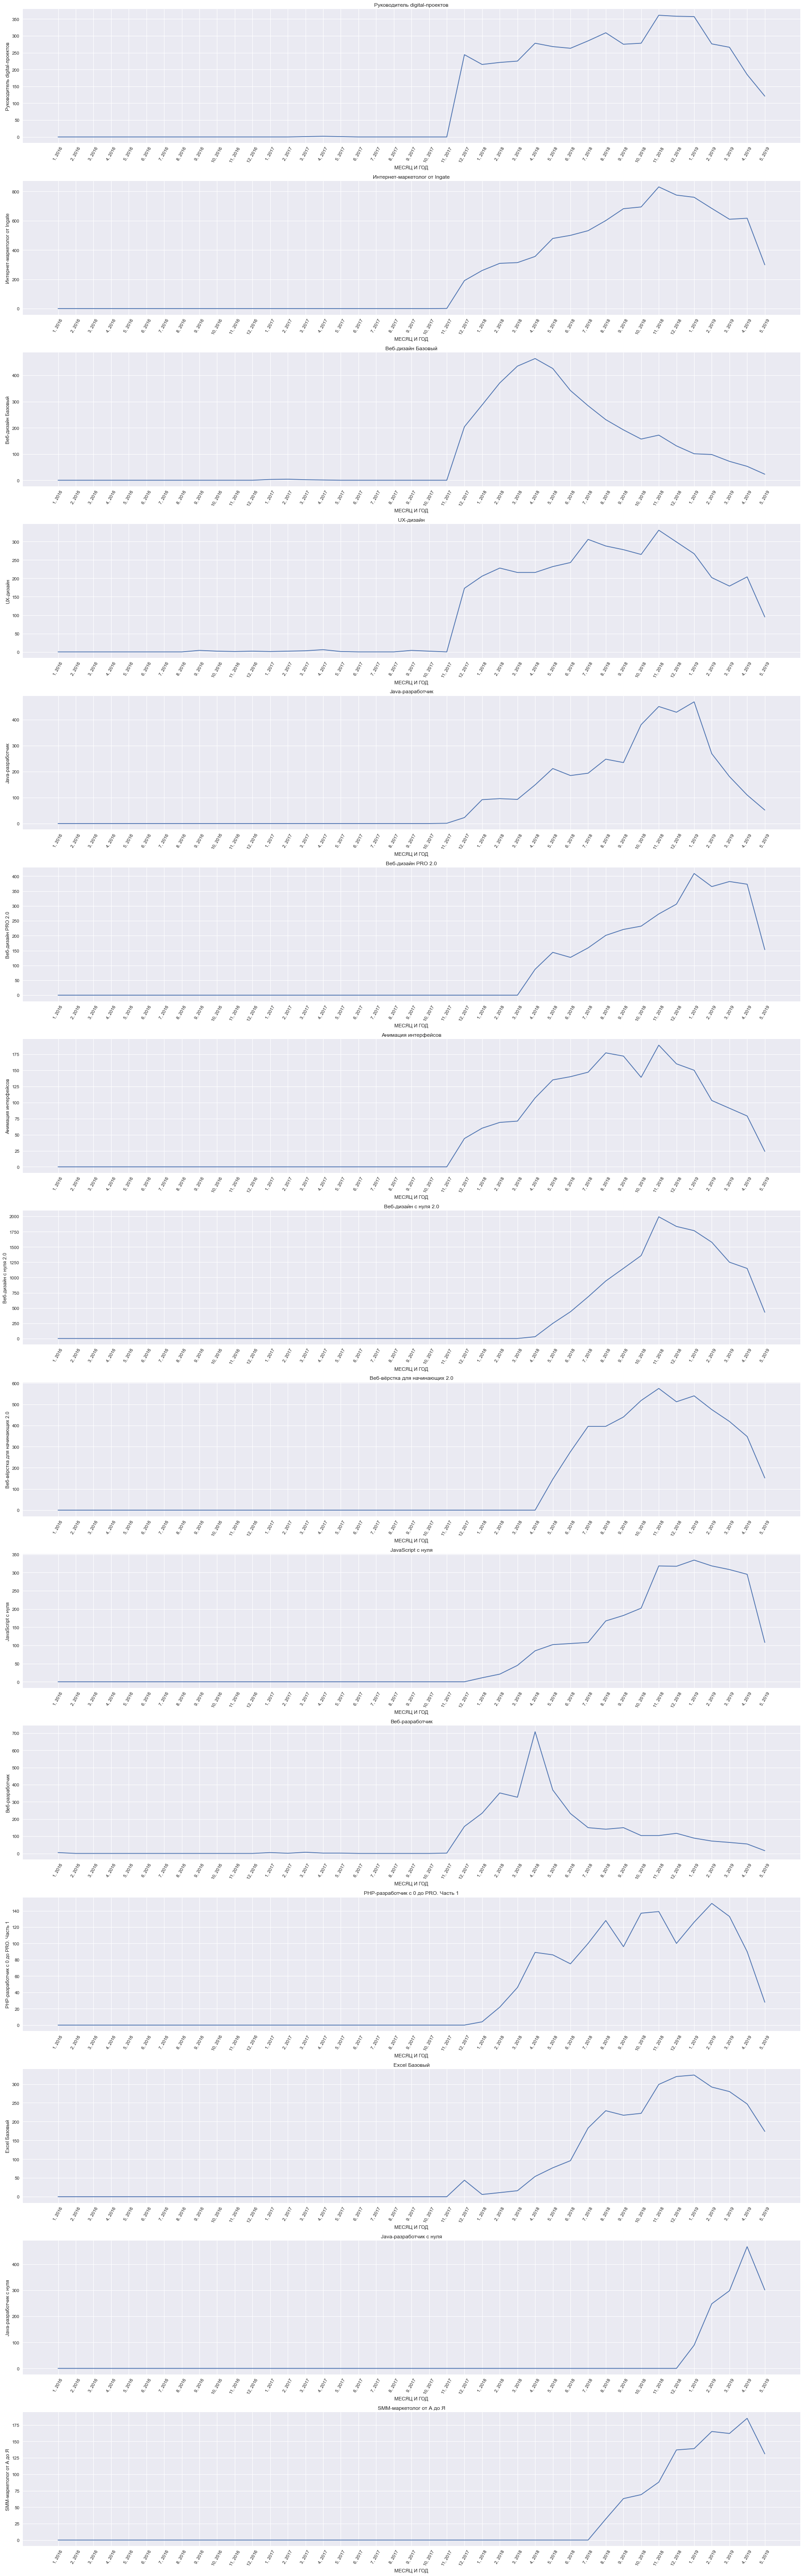

In [382]:
fig_f, ax_f = plt.subplots(figsize = (25, 80), nrows = 15)
for c in courses_indexes: 
    sns.lineplot(ax = ax_f[c[1]-3], 
                data = final_codes_df_cut, 
                x = 'specific_month', 
                y = c[0])
    ax_f[c[1]-3].set_xlabel('месяц и год'.upper())
    ax_f[c[1]-3].set_title(c[0])
    ax_f[c[1]-3].set_xticklabels(list(final_codes_df.specific_month), rotation = 60)
fig_f.tight_layout()
plt.show()

<hr>

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

### ПУНКТ 3.1. min, max, median, mean для времени выполнения домашних работ по модулям в курсах

In [35]:
df_final.head(2).start_date[0] - df_final.head(2).start_date[1]

Timedelta('0 days 00:00:00.010854')

In [36]:
df_time_spent = df_final[df_final['lesson_title'] == 'Домашняя работа']
df_time_spent['time_spent'] = df_time_spent['finish_date'] - df_time_spent['start_date']
# Отбросим все незаполненные ячейки: они ничего не дадут, кроме понимания того, что есть модули, которые до сих пор не завершены. 
df_time_spent.dropna(inplace = True)

In [37]:
df_time_spent['delta_days'] = df_time_spent.time_spent.dt.days

In [38]:
# df_time_spent[df_time_spent['delta_days'] == -1] - люди, которые справлялись с домашкой за минуту

In [39]:
df_time_spent['one'] = 1

#### Проверим, есть ли такие модули, в которых несколько домашних работ. 
#### Если на каждый модуль приходится одна ДЗ, то один студент выполняет одно ДЗ в одном модуле. 
#### Тогда по каждому модулю: число уроков "Домашняя работа" должно быть равно общему числу студентов (Студенты, не начавшие или не завершившие работы, исключены из выборки ранее. Все уроки, кроме уроков "Домашняя работа", исключены из выборки ранее)
#### Проверим

In [40]:
df_time_spent_groupped = df_time_spent.groupby(['title', 'module_number']).count()

In [41]:
df_time_spent_groupped[df_time_spent_groupped['lesson_number'] > df_time_spent_groupped['student_id']]

,,id,student_id,course_id,lesson_number,status,start_date,finish_date,module_title,lesson_title,lesson_token,is_video,is_homework,Unnamed: 0,field,_merge,time_spent,delta_days,one
title,module_number,,,,,,,,,,,,,,,,,,


#### Вывод: в нашей выборке модули с несколькими домашними работами отсутствуют. 

<hr>

### Агрегированная таблица показателей:

In [42]:
time_indicators = df_time_spent.groupby(['title', 'module_number']).agg({'delta_days': ['median', 'mean', 'max', 'min']})
# # Для красоты: 
# time_indicators = pd.DataFrame(time_indicators)

In [43]:
time_indicators.head(10)

delta_days                    
                                   median       mean  max min
title            module_number                               
Excel Базовый    1                    2.0   5.458515  183  -1
                 2                    1.0   3.758621  184  -1
                 3                    1.0   2.850129   89  -1
                 4                    3.0  10.363036  327  -1
                 5                    2.5   6.803704  175  -1
                 6                    2.0   4.512397   77  -1
                 7                    4.0   9.350000  174  -1
                 8                    2.0   8.940860  239  -1
Java-разработчик 1                    3.0   9.314387  269  -1
                 2                    7.0  17.283372  377  -1

-1 означает, что зарегистрированное время выполнения домашней работы - меньше минуты (возможно, у студента заранее были в распоряжении материалы, и он просто загрузил работу)

<hr>

### ПУНКТ 3.2. Line-graph для медианного времени прохождения модуля для каждого курса

In [44]:
titles = list(df_time_spent['title'].unique())

In [45]:
time_median_new = df_time_spent.groupby(['title', 'module_number'], as_index = False).median()[['title', 'module_number','delta_days']]

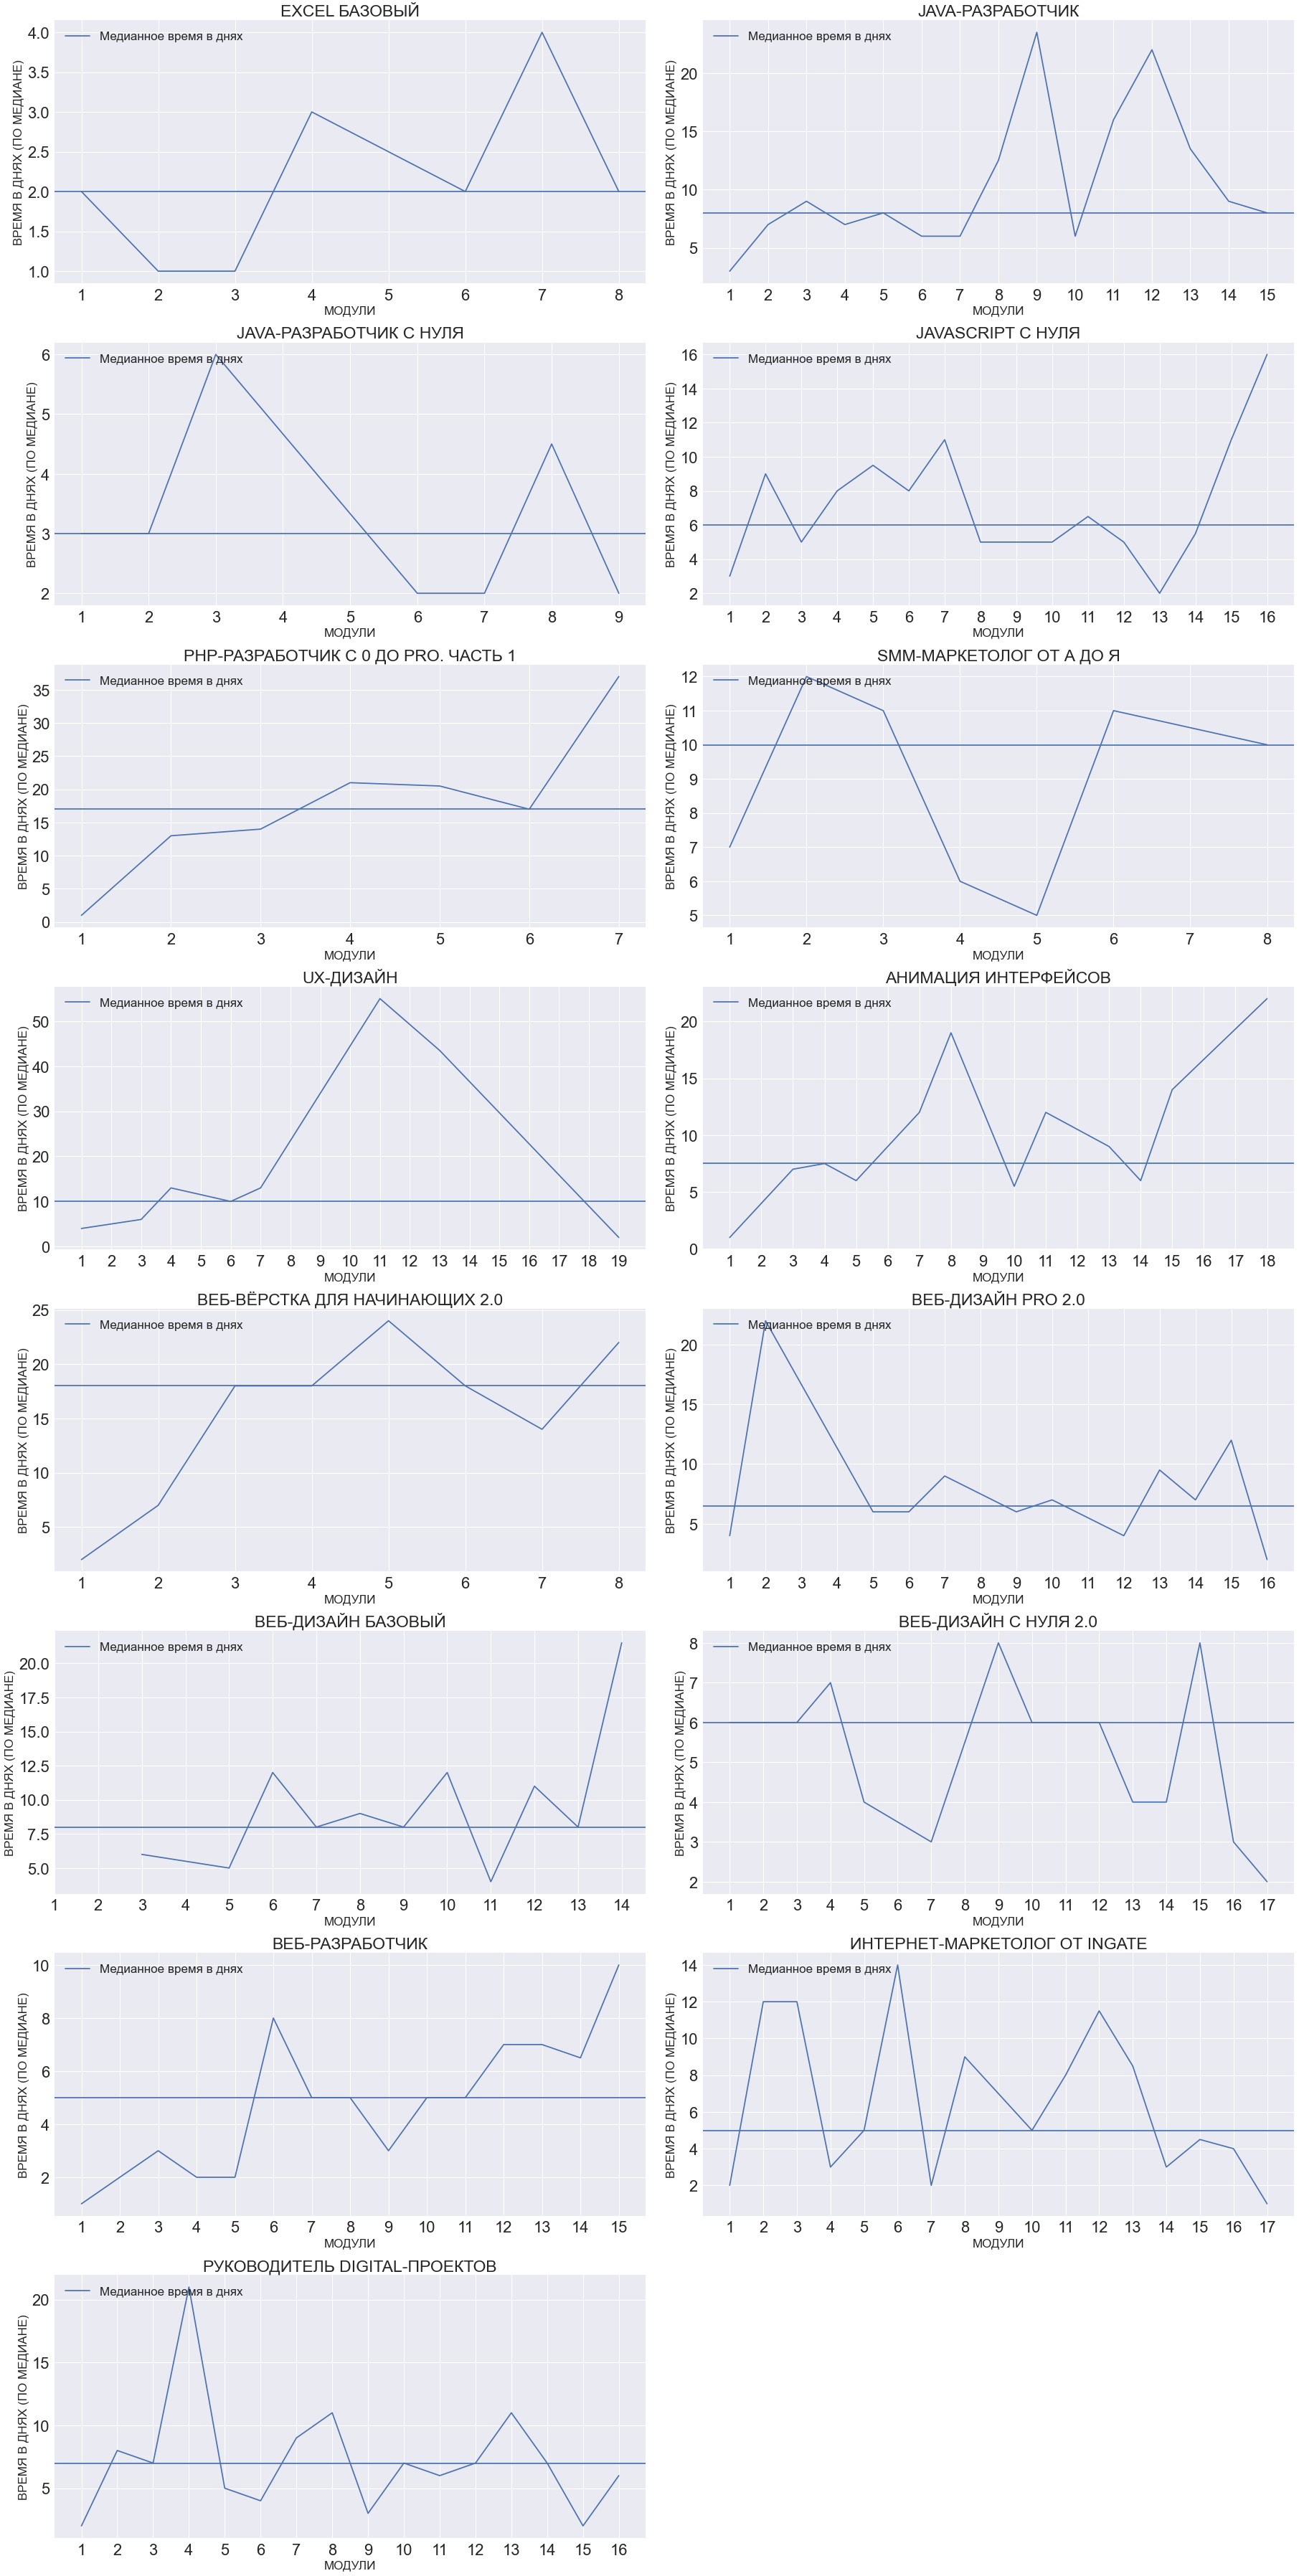

In [46]:
fig_med, ax_med = plt.subplots(nrows = 8, ncols = 2, figsize = (25,50))
ax_med[7, 1].set_axis_off()
for title in ctd: 
    sns.lineplot(ax = ax_med[title['i'], title['j']],
                    data = time_median_new[time_median_new['title'] == title['course']], 
                    x = 'module_number', 
                    y = 'delta_days', 
                    label = 'Медианное время в днях')
    ax_med[title['i'], title['j']].set_xticks([i for i in range(1, time_median_new[time_median_new['title'] == title['course']].module_number.max()+1, 1)])
    ax_med[title['i'], title['j']].set_title(f"{title['course']}".upper(), size = 23)
    ax_med[title['i'], title['j']].set_xlabel('модули'.upper(), size = 17)
    ax_med[title['i'], title['j']].set_ylabel('Время в днях (по медиане)'.upper(), size = 17)
    ax_med[title['i'], title['j']].axhline(time_median_new[time_median_new['title'] == title['course']].delta_days.median())
    ax_med[title['i'], title['j']].legend(loc = 'upper left', fontsize = 17)
fig_med.tight_layout()
plt.show()

### Аналитический вывод: 
Подведем итоги: для каждого курса выделим список модулей с наибольшим медианным временем прохождения. 
<br><br>1. **SMM-маркетолог от А до Я**: модули 2, 3, 6
<br><br>2. **Java-разработчик с нуля**: модули 3, 8
<br><br>3. **PHP-разработчик с 0 до PRO**. модули 4, 7 
<br><br>4. **Веб-дизайн с нуля 2.0**: модули 4, 9, 15
<br><br>5. **Анимация интерфейсов**: модули 7, 8, 11 
<br><br>6. **Веб-дизайн PRO 2.0**: модули 2, 15 
<br><br>7. **JavaScript с нуля**: 2, 7, 16 
<br><br>8. **Excel базовый**: модули 4, 7
<br><br>9. **Веб-разработчик**: модули 6, 12, 13, 15 
<br><br>10. **Веб-дизайн базовый**: модули 6, 10, 12, 14 
<br><br>11. **UX-дизайн**: модули 8-11 (с прогрессирующей сложностью)
<br><br>12. **Интернет-маркетолог от Ingate**: модули 2, 3, 6, 8, 12. 
<br><br>13. **Java-разработчик**: модули 9, 12.
<br><br>14. **Руководитель digital-проектов**: 4, 8, 13. 
<br><br>15. **Веб-верстка для начинающих 2.0.**: модули 3, 5, 8 


<hr>

### ПУНКТ 3.3.

<hr>

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

**конверсия** = все студенты, которые начали дз в этом модуле / все студенты, которые сдали дз в предыдущем модуле. 

### Составим нужную для работы рамку:

In [47]:
df_final.loc[:, 'stat_hw_bin'] = [1 if df_final.loc[item, 'status'] == 'done' else None for item in df_final.index]

In [48]:
df_final_hw = df_final[df_final['lesson_title'] == 'Домашняя работа']

In [49]:
conversion = df_final_hw.groupby(['title', 'module_number'], as_index = False).count()[['title', 'module_number', 'student_id', 'stat_hw_bin']]

In [50]:
conversion[conversion['title'] == 'Веб-дизайн Базовый']

,title,module_number,student_id,stat_hw_bin
103,Веб-дизайн Базовый,3,407,354
104,Веб-дизайн Базовый,5,338,324
105,Веб-дизайн Базовый,6,321,278
106,Веб-дизайн Базовый,7,274,249
107,Веб-дизайн Базовый,8,249,232
108,Веб-дизайн Базовый,9,230,212
109,Веб-дизайн Базовый,10,213,181
110,Веб-дизайн Базовый,11,183,172
111,Веб-дизайн Базовый,12,175,155
112,Веб-дизайн Базовый,13,157,149


In [51]:
np.sort(df_final[(df_final['lesson_title'] == 'Домашняя работа') & (df_final['title'] == 'Веб-дизайн PRO 2.0')].module_number.unique())

array([ 1,  2,  5,  6,  7,  9, 10, 12, 13, 14, 15, 16], dtype=int64)

In [52]:
titles = list(df_final['title'].unique())

In [53]:
associated_frames = []
for title in titles: 
    frame = conversion[conversion['title'] ==  title].sort_values(by = 'module_number', ascending = True)
    associated_frames.append(frame)

### Добавим расчет конверсии:

In [54]:
for frame in associated_frames: 
    # Расчет конверсии:
    li = [frame.loc[i, 'stat_hw_bin'] / frame.loc[(i-1), 'student_id'] for i in range(frame.index.min()+1, frame.index.max()+1, 1)]
    li.insert(0, None)
    frame['conversion'] = li
    # Убрали первые модули, для которых конверсия не рассчитывается:
    frame.dropna(inplace = True)

In [55]:
associated_frames

[                             title  module_number  student_id  stat_hw_bin  \
 161  Руководитель digital-проектов              2         537          375   
 162  Руководитель digital-проектов              3         402          345   
 163  Руководитель digital-проектов              4         335          224   
 164  Руководитель digital-проектов              5         235          215   
 165  Руководитель digital-проектов              6         214          200   
 166  Руководитель digital-проектов              7         197          154   
 167  Руководитель digital-проектов              8         158          134   
 168  Руководитель digital-проектов              9         136          129   
 169  Руководитель digital-проектов             10         125          108   
 170  Руководитель digital-проектов             11         107           98   
 171  Руководитель digital-проектов             12          95           88   
 172  Руководитель digital-проектов             13  

### Визуализируем результаты (возьмем прозрачность за 0.5, потому что 0.1. получается совсем блёкло)

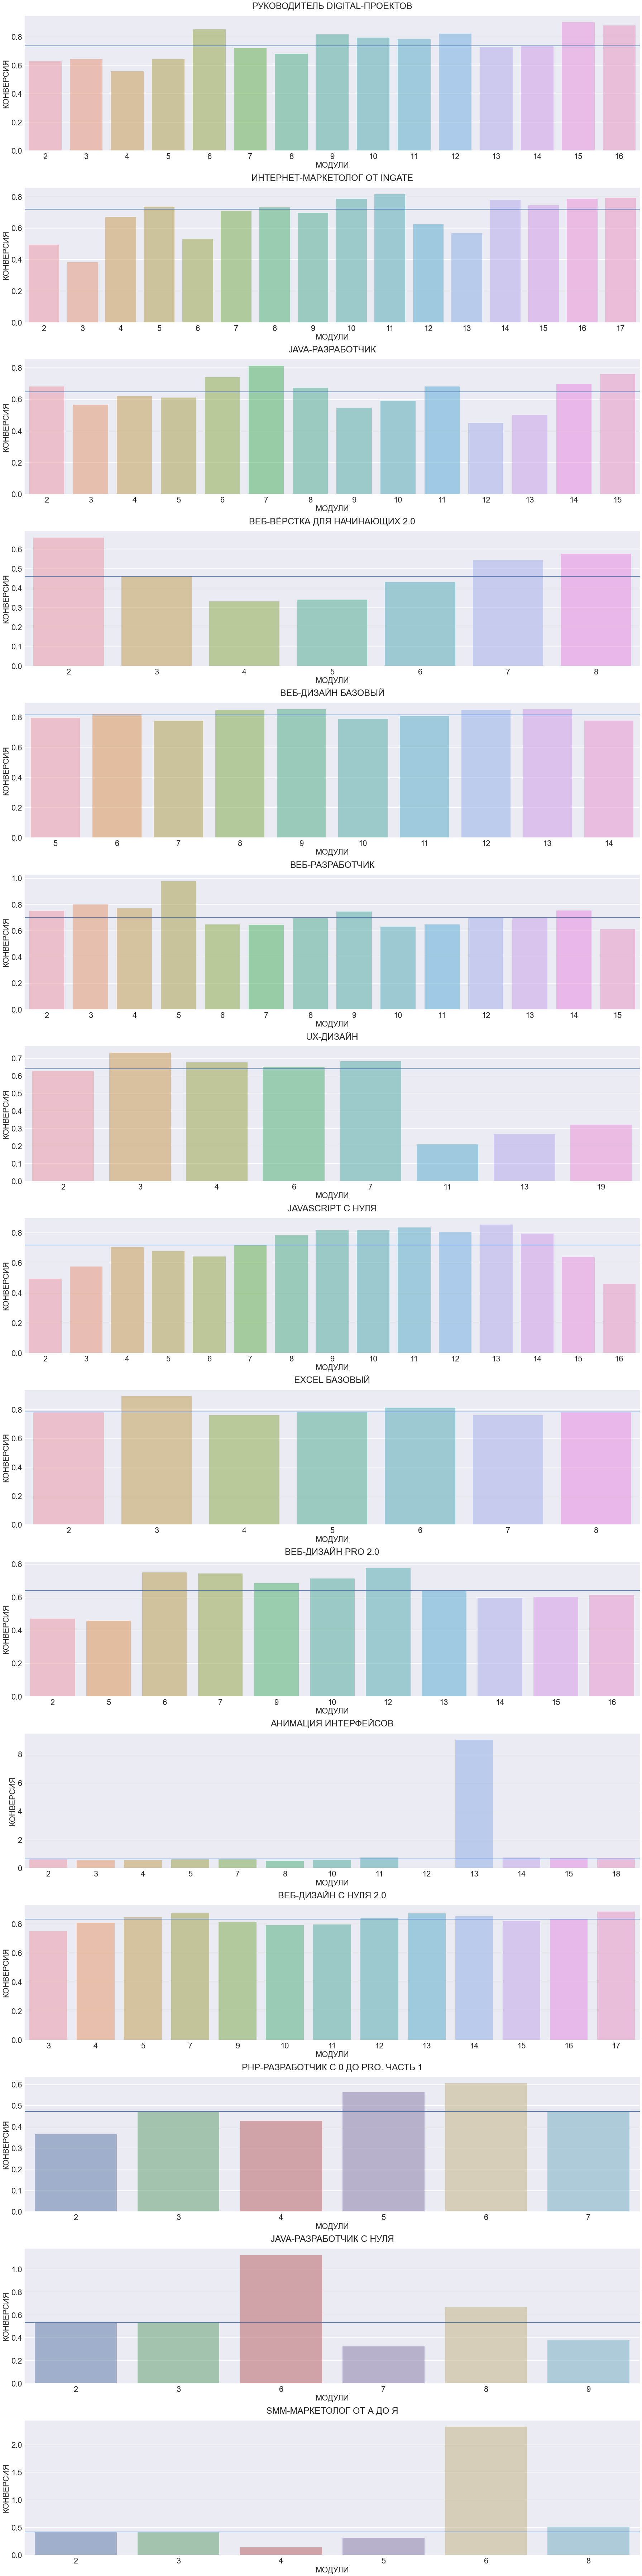

In [56]:
fig_conv, ax_conv = plt.subplots(nrows = 15, ncols = 1, figsize = (25,100))
for i in range(len(associated_frames)):
    sns.barplot(ax = ax_conv[i], 
                data = associated_frames[i], 
                x = 'module_number', 
                y = 'conversion', alpha = 0.5)
    ax_conv[i].set_title(associated_frames[i].iloc[0, 0].upper(), pad = 20, size = 25)
    ax_conv[i].set_xlabel('МОДУЛИ', size = 22)
    ax_conv[i].set_ylabel('КОНВЕРСИЯ', size = 22)
    ax_conv[i].axhline(associated_frames[i].conversion.median())
fig_conv.tight_layout()
plt.show()

### Аналитический вывод: 
Приведем список модулей с наименьшей конверсией перехода по каждому курсу: именно предшествующие им модули вызывают наибольшие трудности. 
<br><br>1. **SMM-маркетолог от А до Я**: модули 4, 9, 11, из которых 11 - дипломный проект, 4 - модуль о дизайне, 9 - модуль о работе с клиентами. Гипотеза: студенты недостаточно мотивированы для выполнения домашней работы по этим модулям. Возможно, она слишком объемная, они не видят возможности получения быстрого результата и обратной связи от куратора. 
<br><br>2. **Java-разработчик с нуля**: модули 2 (о синтаксисе языка), 4 (о массиваях и коллекциях), 6, 7 (о структурах данных, наследовании и полиморфизме),9 - о работе с файлами и сетью. Гипотеза: приходящие студенты недооценивают требуемый уровень технической и математической подготовки для освоения программных структур. 
<br><br>3. **PHP-разработчик с 0 до PRO**. Часть 1: модули 3 (пользовательские функции), 6 (куки/сессии), 8 (курсовая работа). Очевидно, студенты недостаточно мотивированы, чтобы смочь обработать такой объем информации и освоить все технические тонкости языка. Возможно, студенты на входе переоценивают свои возможности и уровень подготовленности. Возможно, некоторые задачи стоит упростить либо дозаписать дополнительные видео, чтобы поддерживать студенческий интерес. 
<br><br>4. **Веб-дизайн с нуля 2.0**: модули 2, 6, 8 (**Бонус-модули**), модули 14 (Adobe XD), 15 (кейс на 1000 лаков)
<br><br>5. **Анимация интерфейсов**: модули 6, 9, 11 (Экспорт анимации в код, Звуки в интерфейсе, Readymag), 16 (Анимация в верстке), 19 (Рабочие будни моушэн-дизайнера) 
<br><br>6. **Веб-дизайн PRO 2.0**: модули 3, 8, 11, 16, 17. Модули касаются формирования продвинутых навыков дизайнера и работы с современным программным обеспечением, что, возможно, вызывает затруднения, особенно учитывая тот объем практического материала, который должен усвоить студент. Возможно, работы часто высылаются на доработку. 
<br><br>7. **JavaScript с нуля**: модули 3, 5, 6, 11, 14. Все модули посвящены высокоуровневым структурам языка, вопросам ООП в JavaScript, вопросам сборке проектов. 
<br><br>8. **Excel базовый**: модули 2 (основной функционал программы), 3 (формулы и функции в Excel), 5 (Более сложные формулы и функции), 9 (Экзаменационная работа). Возможно, материалы заданий для данного курса находится на уровне, который не способен потянуть среднестатический студент.
<br><br>9. **Веб-разработчик**: модули 2 (Общая структура HTML), 16 (Замена тестового файла на PostGre), 19 (Дполнительные модули). Возможное решение проблемы: упрощение модулей по PostGre, также можно посмотреть на содержание дополнительных модулей: насколько оно соответствует целям, задачам курса и тд. 
<br><br>10. **Веб-дизайн базовый**: модули 2 (цели сайта и дизайнера), 4 (Веб-типографика), 8 (Формы и кнопки, интерактивные элементы), 10 (Цвет, атмосфера, тексты и здравый смысл), 12 (Интерактивные элементы), 16 (Финальный день). Возможно, материалы данных заданий усложнены большим числом практических заданий, которые длительно оцениваются и не принимаются преподавателями. 
<br><br>11. **UX-дизайн**: 2 (основные типы проекта), 5 (Бонус: эффектный кейс в 20000 пикселей), 8 (Дизайн-концепция за 60 минут), 10 (Создание рабочего UI KIT), 12 (Анимания интерфейсных элементов). 
<br><br>12. **Интернет-маркетолог от Ingate**: модули 2, 4, 7, 10, 14, 17, 18 - конверсия по данным модулям меньше медианы. 
<br><br>13. **Java-разработчик**: модули 4-7, 13, 17 (структуры данных, ООП-паттерны программирования и прочее).
<br><br>14. **Руководитель digital-проектов**: модули 2,4,9,16,17. 
<br><br>15. **Веб-верстка для начинающих 2.0.**: модули 5 и 6 (Адаптивность и кросс-браузерность и оформление). 


<hr>